# **<font color='blue'>Data Analysis Projects with Python</font>**
## **<font color='blue'> "Exploratory Data Analysis: Techniques and Interpretation of Statistical Visualizations"</font>**


## **Python Packages Used in the Project**


In [69]:
!pip install -q -U watermark

In [70]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [71]:
# 2. Reloading Extensions and Adding Author Information
%reload_ext watermark
%watermark -a "StatsData"


Author: StatsData



## **Loading the Data**


In [72]:
# 3. Load dataset
df = pd.read_csv("dataset.csv")

In [73]:
# 4. Dataset shape
df.shape

(1200, 11)

In [74]:
# 5. Dataset sample
df.head()


,id,release_date,debit_account,credit_account,amount,document,operation_nature,cost_center,taxes,currency,conversion_rate
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,NaN,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,NaN,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,NaN,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [75]:
# 6. Columns
df.columns

Index(['id', 'release_date', 'debit_account', 'credit_account', 'amount',
       'document', 'operation_nature', 'cost_center', 'taxes', 'currency',
       'conversion_rate'],
      dtype='object')

## **Exploratory Analysis Before Cleaning**

In [76]:
# 7. Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1200 non-null   int64  
 1   release_date      1200 non-null   object 
 2   debit_account     1200 non-null   object 
 3   credit_account    1200 non-null   object 
 4   amount            1200 non-null   float64
 5   document          1078 non-null   object 
 6   operation_nature  1080 non-null   object 
 7   cost_center       1200 non-null   object 
 8   taxes             1020 non-null   float64
 9   currency          947 non-null    object 
 10  conversion_rate   982 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 103.2+ KB


In [77]:
# 8. Are there missing values?
df.isna().any()

,0
id,False
release_date,False
debit_account,False
credit_account,False
amount,False
document,True
operation_nature,True
cost_center,False
taxes,True
currency,True


In [78]:
# 9. Are there missing values? How many?
df.isna().sum()

,0
id,0
release_date,0
debit_account,0
credit_account,0
amount,0
document,122
operation_nature,120
cost_center,0
taxes,180
currency,253


In [79]:
# 10. Sum of missing values per column
missing_values = df.isna().sum()

# 11. Total number of rows
total_rows = len(df)

# 12. Proportion of missing values per column
missing_value_proportion = missing_values / total_rows

# Displaying the proportion of missing values
print(missing_value_proportion)

id                  0.000000
release_date        0.000000
debit_account       0.000000
credit_account      0.000000
amount              0.000000
document            0.101667
operation_nature    0.100000
cost_center         0.000000
taxes               0.150000
currency            0.210833
conversion_rate     0.181667
dtype: float64


### **Visualizations**


**Distribution of Transaction Values**: Histogram showing the distribution of monetary transaction values. The density line (KDE) helps to understand the shape of the distribution.


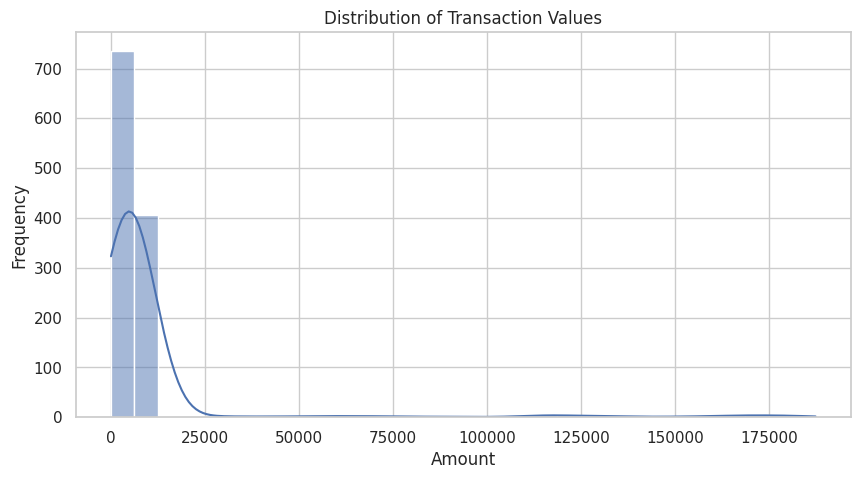

In [80]:
# 13. Plot 1: Distribution of Transaction Values
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**Transaction Values Over Time**: A line plot showing how transaction values have varied over time. This can help identify trends or seasonal patterns in the data.


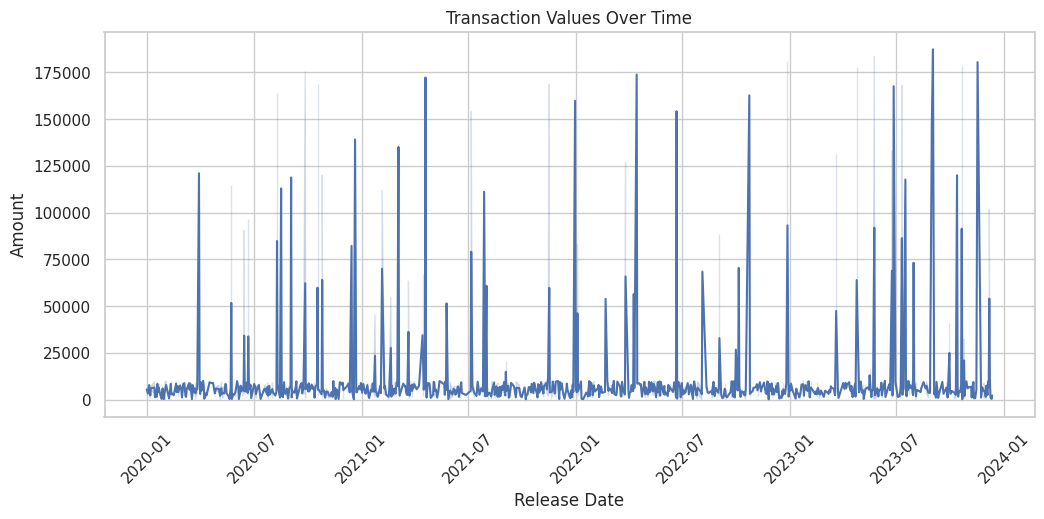

In [81]:
# 14. Plot 2: Transaction Values Over Time
plt.figure(figsize=(12, 5))
df['release_date'] = pd.to_datetime(df['release_date'])
sns.lineplot(x='release_date', y='amount', data=df)
plt.title('Transaction Values Over Time')
plt.xlabel('Release Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


**Tax Boxplot**: This boxplot provides insight into the distribution of tax values, highlighting the median, quartiles, and potential outliers.


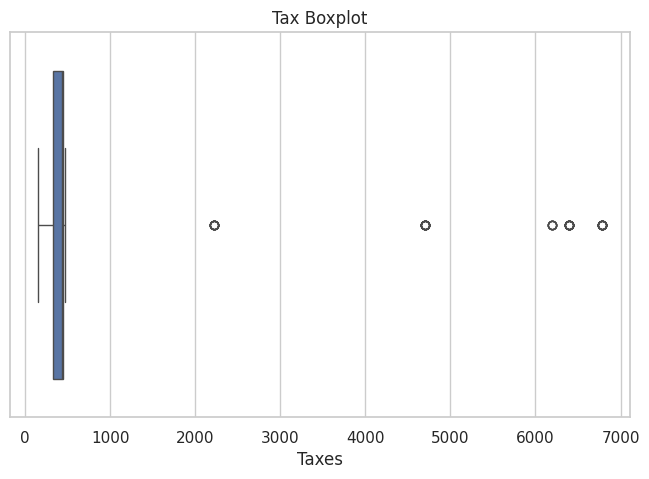

In [82]:
# 15. Plot 3: Tax Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['taxes'])
plt.title('Tax Boxplot')
plt.xlabel('Taxes')
plt.show()

**Count of Transactions by Currency**: A bar chart showing the number of transactions conducted in different currencies. This can be useful for understanding the prevalence of certain currencies in transactions.


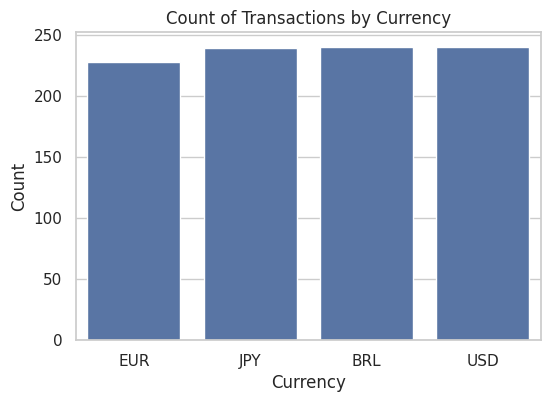

In [83]:
# 16. Plot 4: Count of Transactions by Currency
plt.figure(figsize=(6, 4))
sns.countplot(x='currency', data=df)
plt.title('Count of Transactions by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.show()

## **Handling Missing Values**

**1. Handling Missing Values for Numeric Variables**

For numeric variables, such as 'amount' or 'taxes,' a common approach is to replace missing values with the mean or median of the column. The choice between mean or median typically depends on the data distribution.


In [84]:
# 17. Are there missing values?
df['taxes'].isna().sum()

180

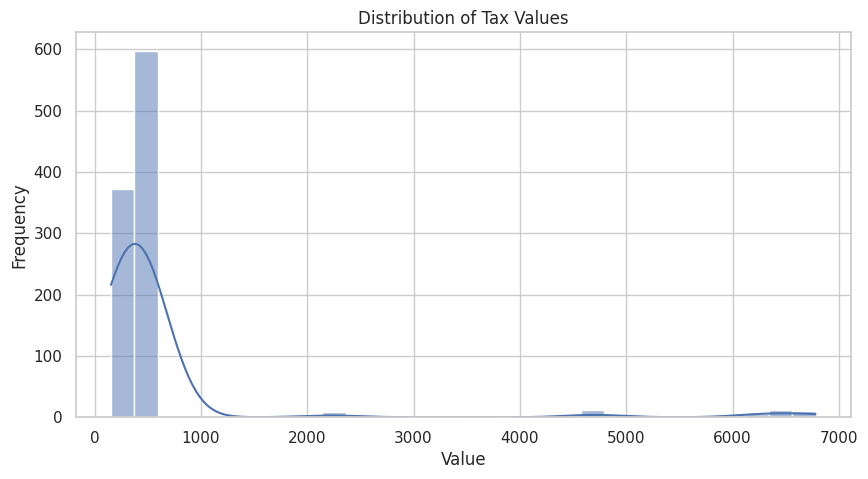

In [85]:
# 18. Distribution of Tax Values
plt.figure(figsize=(10, 5))
sns.histplot(df['taxes'], kde=True, bins=30)
plt.title('Distribution of Tax Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [86]:
# 19. Mean
df['taxes'].mean()

604.264545965864

In [87]:
# 20. Median
df['taxes'].median()


430.1553391717098

In [88]:
# 21. Replacing missing values in 'taxes' with the median
df['taxes'].fillna(df['taxes'].median(), inplace=True)

In [89]:
# 22. Are there missing values?
df['taxes'].isna().sum()

0

**2. Handling Missing Values for Categorical Variables**

For categorical variables, such as 'currency', you can replace missing values with the most frequent value (mode) or categorize them as 'Unknown'.


In [90]:
# 23. Are there missing values? How many?
df.isna().sum()

,0
id,0
release_date,0
debit_account,0
credit_account,0
amount,0
document,122
operation_nature,120
cost_center,0
taxes,0
currency,253


In [91]:
# 24. Are there missing values in 'currency'?
df['currency'].isna().sum()

253

In [92]:
# 25. Calculate the mode
df['currency'].mode()[0]

'BRL'

In [93]:
# 26. Replacing missing values in 'currency' with the mode
df['currency'].fillna(df['currency'].mode()[0], inplace=True)

In [94]:
# 27. Are there missing values in 'currency'?
df['currency'].isna().sum()

0

In [95]:
# 28. Calculating the sum of missing values per column
missing_values = df.isna().sum()

# 29. Calculating the total number of rows
total_rows = len(df)

# 30. Calculating the proportion of missing values per column
missing_value_proportion = missing_values / total_rows

# Displaying the proportion of missing values
print(missing_value_proportion)

id                  0.000000
release_date        0.000000
debit_account       0.000000
credit_account      0.000000
amount              0.000000
document            0.101667
operation_nature    0.100000
cost_center         0.000000
taxes               0.000000
currency            0.000000
conversion_rate     0.181667
dtype: float64


In [96]:
# 31. Filling missing values in 'conversion_rate' with the category 'Other'
df['conversion_rate'].fillna('Other', inplace=True)

In [97]:
# 32. Filling missing values in 'document' with the category 'Other'
df['document'].fillna('Other', inplace=True)

In [98]:
# 33. Filling missing values in 'operation_nature' with bfill
# This method fills each missing value with the next valid value in the same column (backward fill)
df['operation_nature'].fillna(method='bfill', inplace=True)

In [99]:
df.head()

,id,release_date,debit_account,credit_account,amount,document,operation_nature,cost_center,taxes,currency,conversion_rate
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,BRL,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Other,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


**3. Handling Missing Values When They Don’t Appear as Missing**

Sometimes, missing values may be disguised as placeholders like 'N/A', '?', 'Unknown', or even '0' in contexts where '0' is not a valid value. Identify these cases and treat them as missing values.


In [100]:
# 34. Checking for the '?' character in the 'credit_account' column (Method 1)
has_question_mark = df['credit_account'].isin(['?']).any()
print(has_question_mark)


True


In [101]:
# 35. Counting the frequency of each value in the 'credit_account' column (Method 2)
value_counts = df['credit_account'].value_counts()

# Checking if '?' is in the counts and getting its number of occurrences
question_mark_count = value_counts.get('?', 0)

# Print the number of occurrences of '?'
print(question_mark_count)


4


In [102]:
# 36. Identifying categorical columns (Method 3)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Check for the presence of '?' in each categorical column
for column in categorical_columns:
    has_question_mark = df[column].isin(['?']).any()
    print(f"Does the column '{column}' contain '?'? {has_question_mark}")

Does the column 'debit_account' contain '?'? False
Does the column 'credit_account' contain '?'? True
Does the column 'document' contain '?'? False
Does the column 'operation_nature' contain '?'? False
Does the column 'cost_center' contain '?'? False
Does the column 'currency' contain '?'? False
Does the column 'conversion_rate' contain '?'? False


In [103]:
# 37. Replacing '?' with NaN and then filling missing values
df['credit_account'].replace('?', np.nan, inplace=True)

# This method fills each missing value with the previous valid value in the same column (forward fill)
df['credit_account'].fillna(method='ffill', inplace=True)

In [104]:
# 38. Are there missing values in 'credit_account'?
df['credit_account'].isna().sum()

0

In [105]:
# 39. Are there missing values?
df.isna().sum()

,0
id,0
release_date,0
debit_account,0
credit_account,0
amount,0
document,0
operation_nature,0
cost_center,0
taxes,0
currency,0


## **Outlier Treatment**


> We will apply outlier treatment to the "amount" and "taxes" variables.


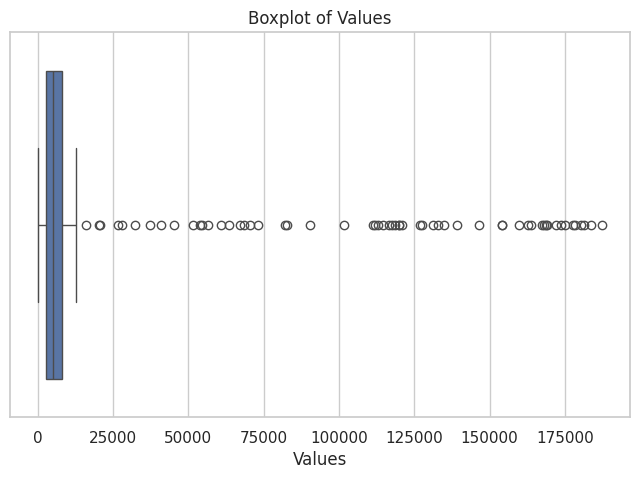

In [106]:
# 40. Boxplot of Transaction Values
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()

In [107]:
# 41. Outlier treatment for the 'amount' variable

# Calculating Q1 and Q3
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Setting limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtering out the outliers
df_filtered_1 = df[~((df['amount'] < lower_limit) | (df['amount'] > upper_limit))]

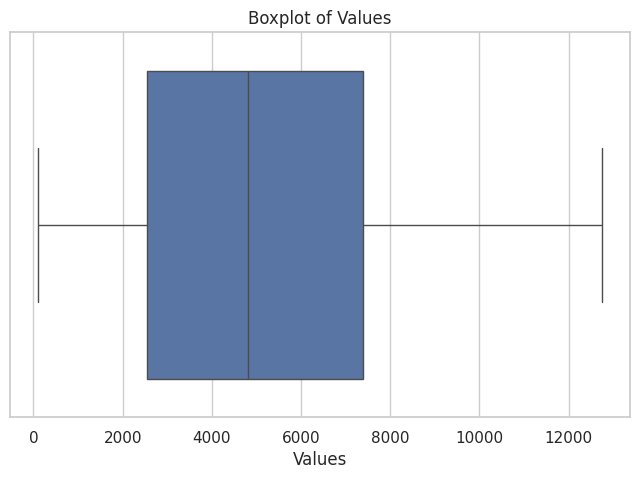

In [108]:
# 42. Boxplot of Transaction Values (after filtering outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_1['amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()

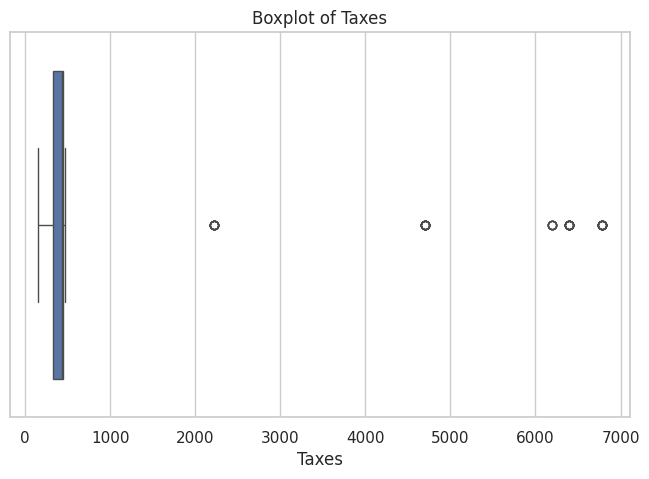

In [109]:
# 43. Boxplot of Taxes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['taxes'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()

In [110]:
# 44. Outlier treatment for the 'taxes' variable

# Calculating Q1 and Q3
Q1 = df['taxes'].quantile(0.25)
Q3 = df['taxes'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Setting limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtering out the outliers
df_filtered_2 = df_filtered_1[~((df_filtered_1['taxes'] < lower_limit) | (df_filtered_1['taxes'] > upper_limit))]


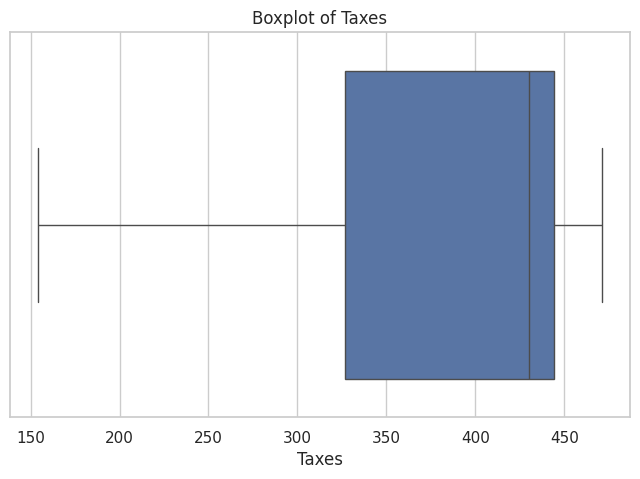

In [111]:
# 45. Boxplot of Taxes (after filtering outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['taxes'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()

## **Exploratory Analysis After Cleaning**

### **Univariate Exploratory Analysis**


In [112]:
# 46. Dataset info after cleaning
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1097 non-null   int64         
 1   release_date      1097 non-null   datetime64[ns]
 2   debit_account     1097 non-null   object        
 3   credit_account    1097 non-null   object        
 4   amount            1097 non-null   float64       
 5   document          1097 non-null   object        
 6   operation_nature  1097 non-null   object        
 7   cost_center       1097 non-null   object        
 8   taxes             1097 non-null   float64       
 9   currency          1097 non-null   object        
 10  conversion_rate   1097 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 102.8+ KB


### **Analyzing and Interpreting Histograms**

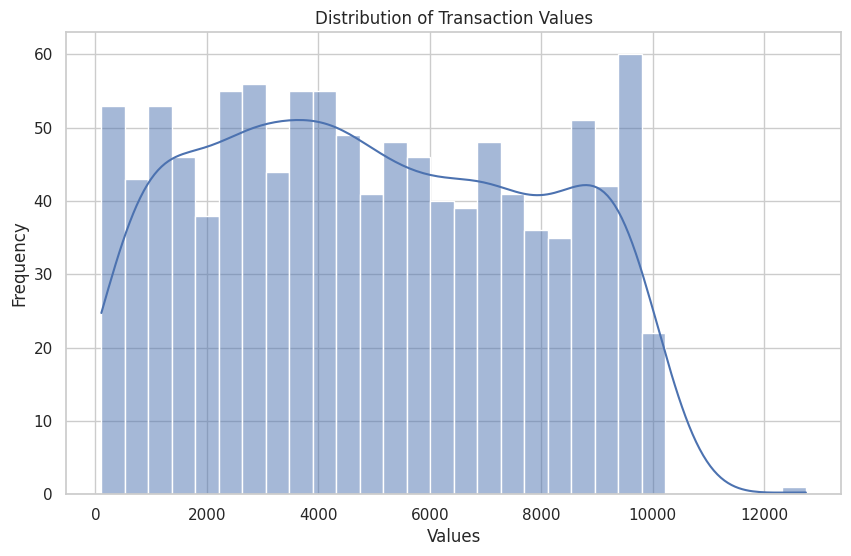

In [113]:
# 47. Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram for the 'amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2['amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

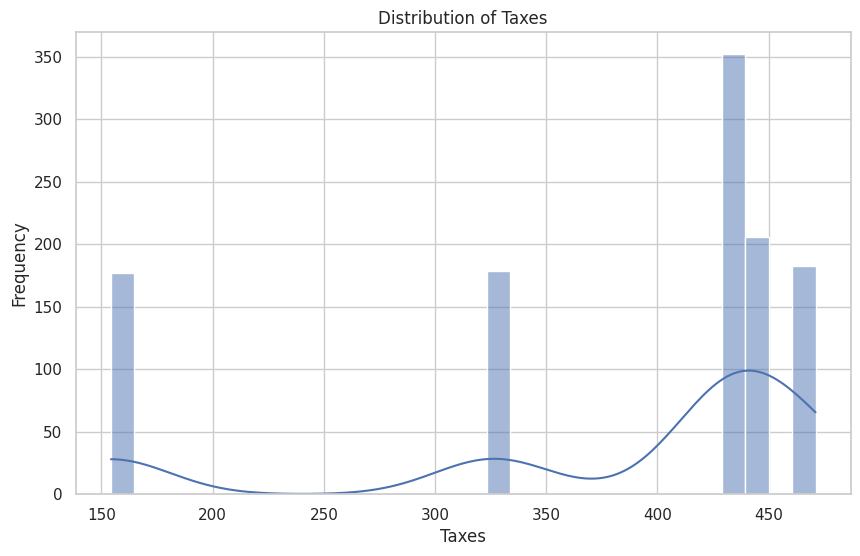

In [114]:
# 48. Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram for the 'taxes' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2['taxes'], kde=True, bins=30)
plt.title('Distribution of Taxes')
plt.xlabel('Taxes')
plt.ylabel('Frequency')
plt.show()

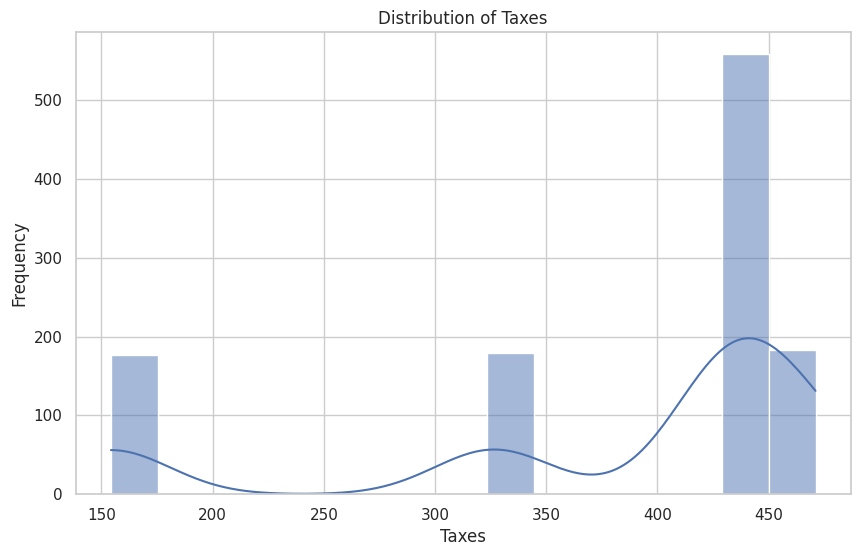

In [115]:
# 48. Setting seaborn style
sns.set(style="whitegrid")

# Creating a histogram for the 'taxes' column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_2['taxes'], kde=True, bins=15)
plt.title('Distribution of Taxes')
plt.xlabel('Taxes')
plt.ylabel('Frequency')
plt.show()

**Histogram Interpretation**:

Interpreting a histogram is essential for understanding the data distribution. A histogram is a chart that shows the frequency with which values in a dataset occur within specific intervals or 'bins'. Here are the steps to interpret it:

**1. Observe the Overall Shape**

The shape of the histogram can reveal a lot about the nature of the data.

Symmetrical Distribution: If the chart is symmetrical around a central value, it indicates a normal or nearly normal distribution.

Skewed Distribution: If the tail of the chart extends more to the left or right, it indicates skewness. Skewness to the left indicates negative skewness; skewness to the right indicates positive skewness.


In [116]:
# 49. Importing skew function from scipy.stats
from scipy.stats import skew

In [117]:
# 50. Calculating skewness
skewness = skew(df_filtered_2['amount'])
print(f"The skewness of the distribution of values is: {skewness}")

The skewness of the distribution of values is: 0.09784439352386005


In [118]:
# 51. Calculating skewness
skewness = skew(df_filtered_2['taxes'])
print(f"The skewness of the distribution of taxes is: {skewness}")

The skewness of the distribution of taxes is: -1.2735246899435217


- A skewness value of zero suggests that the distribution is perfectly symmetrical.
- A positive skewness value indicates a distribution with a heavier tail to the right.
- A negative skewness value indicates a distribution with a heavier tail to the left.


**2. Identify Peaks and Valleys**

Presence of multiple peaks: This may indicate that the data has multiple groups or modes.

Peaks (Modes): The highest points of the histogram are the modes, indicating the most common values in the data.
Valleys: These are the areas between peaks, which may indicate a separation between different groups in the data.

**3. Check the Bin Width**

The width of the intervals (bins) can affect the appearance of the histogram. Very wide bins can hide important details, while very narrow bins can show too much random variation.

**4. Observe Outliers**

Outliers may appear as isolated bars distant from the rest of the data, indicating atypical values.

**5. Analyze the X and Y Axes**

- X-axis (horizontal): Shows the value intervals of the data.
- Y-axis (vertical): Shows the frequency or count of occurrences in each bin.


----

### **Analyzing and Interpreting Boxplots**

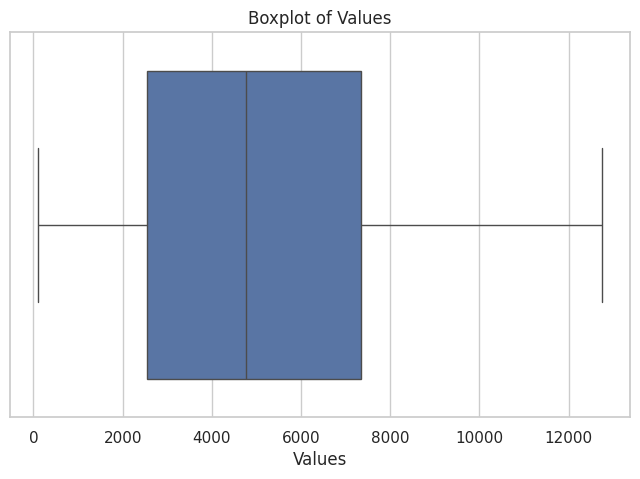

In [119]:
# 52. Boxplot of Values
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['amount'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()


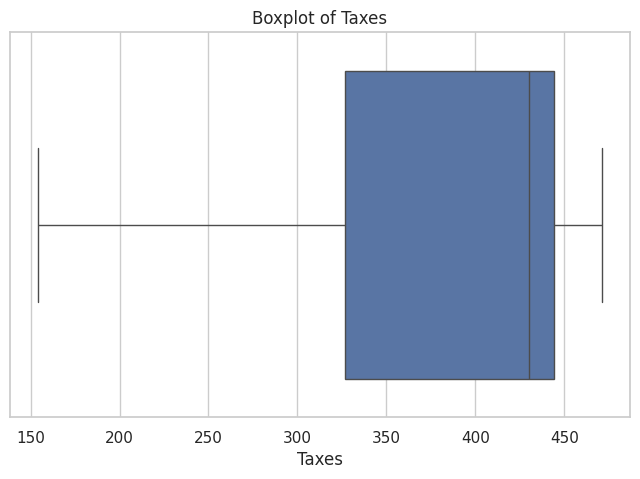

In [120]:
# 53. Boxplot of Taxes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered_2['taxes'])
plt.title('Boxplot of Taxes')
plt.xlabel('Taxes')
plt.show()


**Boxplot Interpretation:**

Interpreting a boxplot, also known as a box-and-whisker plot, is essential to understand the data’s distribution, central tendency, and variability. The boxplot provides a concise visual representation that highlights the quartiles and outliers within the data. Here are the main components of a boxplot and how to interpret them:

**1. Quartiles**

The boxplot is divided into quartiles:

- **Q1 (First Quartile):** Represents the value below which 25% of the data lies.
- **Q2 (Median):** Divides the data in half, with 50% of values below and 50% above it.
- **Q3 (Third Quartile):** Represents the value below which 75% of the data lies.

**2. Interquartile Range (IQR)**

The **IQR** is the distance between Q1 and Q3. It represents the range of the central 50% of the data. A larger IQR indicates greater spread within this central portion.

**3. Whiskers**

The "whiskers" extend from Q1 and Q3 to show the variation outside the central 50%. Typically, they extend up to 1.5 * IQR above Q3 and below Q1.

Data points beyond the whiskers are considered potential outliers.

**4. Outliers**

Outliers are data points that fall outside the whiskers. These are often represented as individual dots or circles on the plot.

**5. Symmetry**

If the median is centered within the box and the whiskers are similar in length, the data is more symmetrical.

If the median is closer to Q1 or Q3, or if one whisker is significantly longer, the data is skewed.

A longer box indicates greater variability in the central data. The presence of outliers may suggest extreme variations or issues with the data.

### **Multivariate Exploratory Analysis**

### **Analyzing and Interpreting Correlation Maps**

In [121]:
# 54. Display the first few rows of the filtered dataset
df_filtered_2.head()

,id,release_date,debit_account,credit_account,amount,document,operation_nature,cost_center,taxes,currency,conversion_rate
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,BRL,3.475606
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Other,OP62LG1,CCZD80Y,154.26398,EUR,3.523287


In [122]:
# 55. Display information about the filtered dataset
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1097 non-null   int64         
 1   release_date      1097 non-null   datetime64[ns]
 2   debit_account     1097 non-null   object        
 3   credit_account    1097 non-null   object        
 4   amount            1097 non-null   float64       
 5   document          1097 non-null   object        
 6   operation_nature  1097 non-null   object        
 7   cost_center       1097 non-null   object        
 8   taxes             1097 non-null   float64       
 9   currency          1097 non-null   object        
 10  conversion_rate   1097 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 102.8+ KB


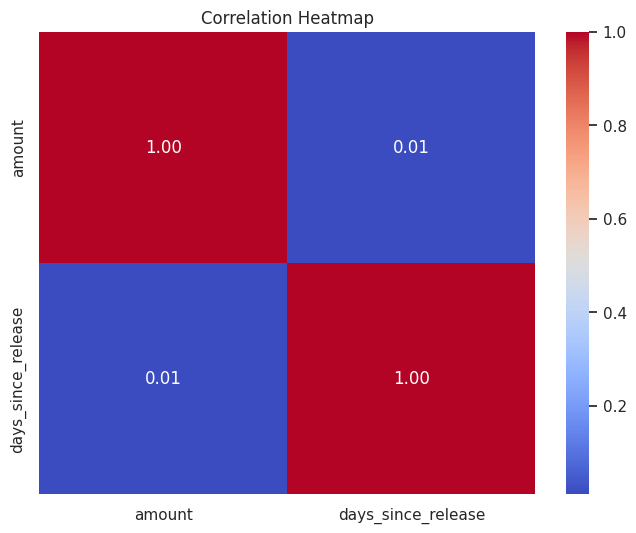

In [123]:
# 56. Converting 'release_date' to datetime
df_filtered_2['release_date'] = pd.to_datetime(df_filtered_2['release_date'])

# 57. Creating a new column representing the number of days since the earliest date
min_date = df_filtered_2['release_date'].min()
df_filtered_2['days_since_release'] = (df_filtered_2['release_date'] - min_date).dt.days

# 59. Calculating the correlation between 'amount' and 'days_since_release'
correlation_matrix = df_filtered_2[['amount', 'days_since_release']].corr()

# 60. Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [124]:
# 58. Display the first few rows of the filtered dataset
df_filtered_2.head()

,id,release_date,debit_account,credit_account,amount,document,operation_nature,cost_center,taxes,currency,conversion_rate,days_since_release
0,1,2022-02-27,DWAVRL,CIOVQ6,5533.25,DOCPAXGQ,OP7JDVK,CC5FYA2,444.13252,BRL,3.475606,788
1,2,2022-05-11,D8TF53,CV9Y0V,7180.37,DOCBXZXG,OPXSY64,CCLH4R9,471.09236,EUR,3.523287,861
2,3,2020-03-23,D0TZCE,CELQSH,6067.36,DOCF5ITC,OPTDE9B,CCDG8CJ,326.49988,JPY,3.523287,82
3,4,2021-06-14,DOGLK7,CDFEMS,5494.34,DOCZRS1U,OP62LG1,CC98G2K,471.09236,JPY,3.523287,530
4,5,2022-11-13,DHL0I5,CRU97G,4294.18,Other,OP62LG1,CCZD80Y,154.26398,EUR,3.523287,1047


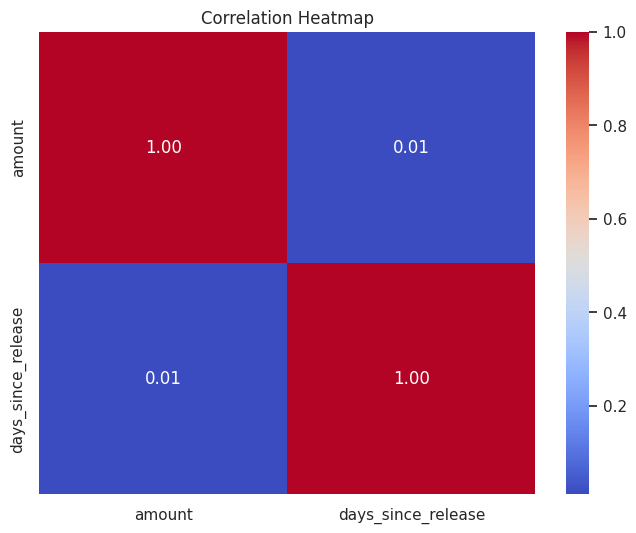

In [125]:
# 59. Calculating the correlation between 'amount' and 'days_since_release'
correlation_matrix = df_filtered_2[['amount', 'days_since_release']].corr()

# 60. Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**The Correlation Map (or Heatmap)** is a visual tool used to represent the strength and direction of the correlation between two or more variables. Here’s how to interpret it:

**Values in the Matrix:**

Each cell in the matrix shows the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1.

- **1** indicates a perfect positive correlation (when one variable increases, the other also increases).
- **-1** indicates a perfect negative correlation (when one variable increases, the other decreases).
- **0** indicates no correlation (the variables have no linear relationship).

**Colors:**

The colors represent the strength of the correlation, usually following a gradient.

**Interpretation:**

- **Strong Positive Correlation (values close to 1):** When one variable increases, the other also tends to increase. For example, in sales data, there may be a strong positive correlation between advertising spending and revenue.
- **Strong Negative Correlation (values close to -1):** When one variable increases, the other tends to decrease. For example, in health data, there may be a strong negative correlation between exercise quantity and body weight.
- **Weak or No Correlation (values close to 0):** The variables have no clear linear relationship. One variable does not reliably predict the other.

**Considerations:**

Correlation does not imply causation. Even if two variables are strongly correlated, it does not mean one causes the other. Other factors may influence the variables. Therefore, more in-depth analyses, such as causality analysis, may be necessary to understand relationships between variables.

When analyzing the correlation heatmap between 'amount' and 'days_since_release,' you observe how these two variables move together, which can help you better understand trends and patterns in your data.

### **Analyzing and Interpreting Scatter Plots**

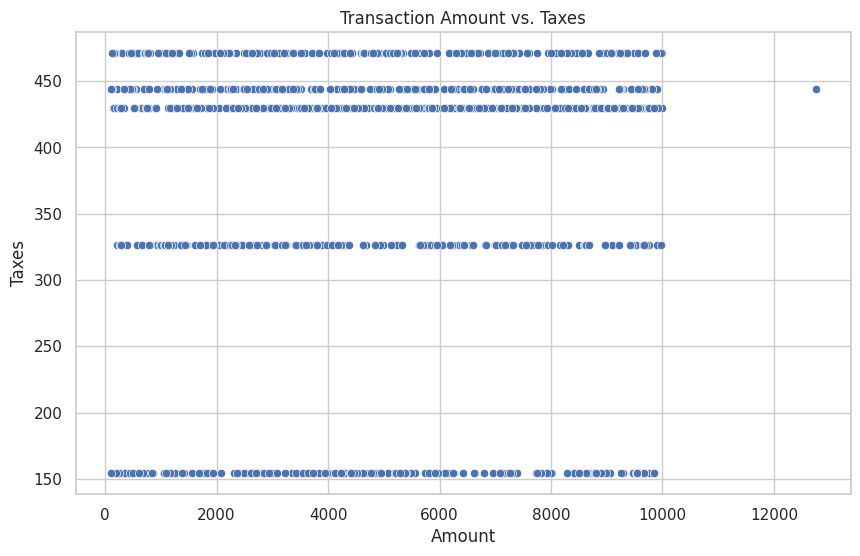

In [126]:
# 61. Creating the scatter plot between 'amount' and 'taxes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='taxes', data=df_filtered_2)
plt.title('Transaction Amount vs. Taxes')
plt.xlabel('Amount')
plt.ylabel('Taxes')
plt.show()


The scatter plot is an effective visual tool for exploring the relationship between two quantitative variables. Here are the key aspects to interpret a scatter plot:

**Overall Pattern and Direction of Relationship:**

- **Positive:** If the points tend to rise from left to right, this indicates a positive correlation; as one variable increases, the other also tends to increase.
- **Negative:** If the points tend to fall from left to right, this indicates a negative correlation; as one variable increases, the other tends to decrease.
- **No Trend:** If the points are randomly scattered without a clear direction, this suggests little or no linear correlation between the variables.

**Strength of Relationship:**

- **Strong:** Points close to an imaginary line indicate a strong linear relationship.
- **Weak:** Points widely scattered around the line indicate a weaker linear relationship.
- **Outliers:** Points that do not follow the general pattern may indicate outliers or anomalies, which may warrant further investigation.

**Form of Relationship:**

Relationships may be curvilinear or follow other patterns, beyond simple linearity.

**Homoscedasticity vs. Heteroscedasticity:**

- **Homoscedasticity:** The spread of points remains consistent along the axis.
- **Heteroscedasticity:** The spread of points changes, which may indicate variability differences of one variable in relation to the other.

### **Exploratory Analysis of Numerical vs. Categorical Data**

To analyze the association between a categorical variable and a numerical variable in the dataset, we first need to select appropriate variables. A common approach is to compare a numerical variable (such as `amount`) with a categorical variable (such as `debit_account`, `credit_account`, `operation_nature`, `cost_center`, or `currency`).

Let's choose a categorical variable for analysis. A common method for this is to use boxplots, which show the distribution of the numerical variable within each category of the categorical variable. This helps us understand if there are significant differences in values across different categories.

We’ll select a categorical variable and create a boxplot to visualize the association. Let's analyze the association between `amount` and `currency`.

The categorical variable `currency` has a balanced distribution, with three categories (USD, JPY, EUR) and a sufficient number of observations in each. This makes it suitable for analyzing its association with the numerical variable `amount`.

We’ll create a boxplot to visualize the distribution of values for each currency. This type of plot will help us determine if there are significant differences in transaction amounts across different currencies.

In [127]:
# 62. Display information about the filtered dataset
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1097 non-null   int64         
 1   release_date        1097 non-null   datetime64[ns]
 2   debit_account       1097 non-null   object        
 3   credit_account      1097 non-null   object        
 4   amount              1097 non-null   float64       
 5   document            1097 non-null   object        
 6   operation_nature    1097 non-null   object        
 7   cost_center         1097 non-null   object        
 8   taxes               1097 non-null   float64       
 9   currency            1097 non-null   object        
 10  conversion_rate     1097 non-null   object        
 11  days_since_release  1097 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 111.4+ KB


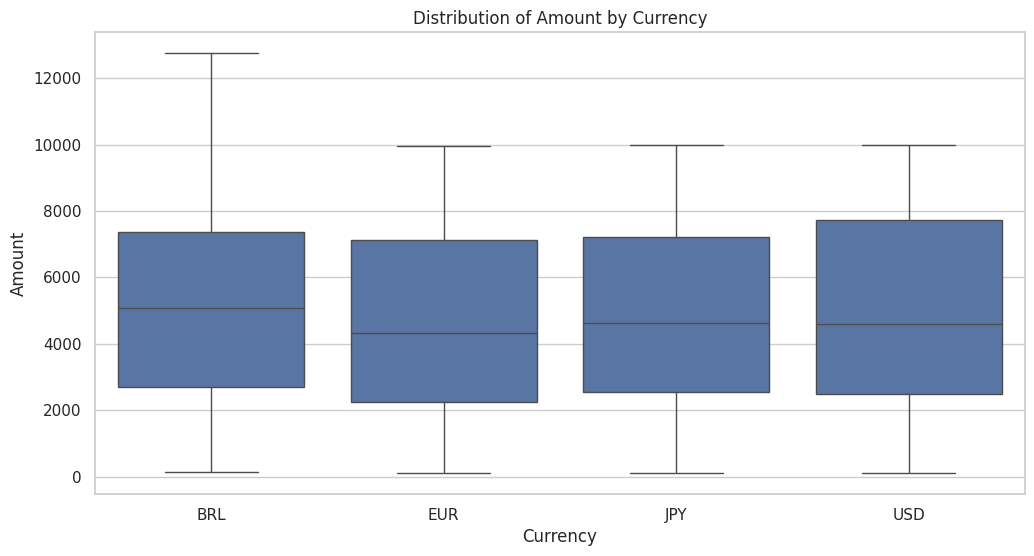

In [128]:
# 63. Creating a boxplot to analyze the association between 'amount' and 'currency'
plt.figure(figsize=(12, 6))
sns.boxplot(x='currency', y='amount', data=df_filtered_2)
plt.title('Distribution of Amount by Currency')
plt.xlabel('Currency')
plt.ylabel('Amount')
plt.show()

In [129]:
%watermark -a "StatsData"

Author: StatsData



In [130]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [131]:
%watermark --iversions

scipy     : 1.13.1
matplotlib: 3.8.0
pandas    : 2.2.2
numpy     : 1.26.4
seaborn   : 0.13.2



# **The End**